<a href="https://colab.research.google.com/github/f-flavia/Nobel-Prize/blob/main/The_most_Nobel_of_Prizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [76]:
nobel = pd.read_csv('nobel.csv')

In [77]:
nobel.head(10)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [78]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [79]:
# Quantity of editions

q_edition = nobel.year.drop_duplicates().size
print("Quantity of editions : "+ str(q_edition))

Quantity of editions : 113


In [80]:
# Quantity of prizes

q_prize = nobel.prize.size
print("Quantity of prizes : "+ str(q_prize))

Quantity of prizes : 911


In [81]:
# Quantity of winners

q_laureate = nobel.laureate_id.drop_duplicates().size
print("Quantity of laureates : "+ str(q_laureate))

Quantity of laureates : 904


In [82]:
# Quantity of countries

q_country = nobel.birth_country.drop_duplicates().size
print("Quantity of countries : "+ str(q_country))

Quantity of countries : 122


In [83]:
# Quantity of organizations

q_org = nobel.organization_name.drop_duplicates().size
print("Quantity of organizations : "+ str(q_org))

Quantity of organizations : 296


In [84]:
# Quantity of male and female winners

display(nobel['sex'].value_counts())

Male      836
Female     49
Name: sex, dtype: int64

In [85]:
# Percentage of female winners

perc_fem = (49/836)*100
print(perc_fem)

5.861244019138756


Only 5.86% of winners are female.

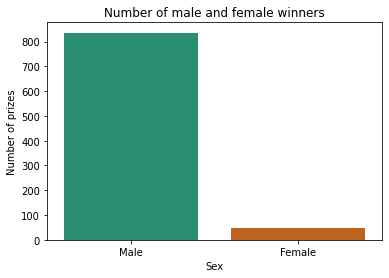

In [86]:
# Plotting the number of male and female winners
sns.countplot(x=nobel['sex'], palette='Dark2')

plt.xlabel("Sex")
plt.ylabel("Number of prizes")
plt.title("Number of male and female winners")
plt.show()

49 women have received a Nobel Prize considering all editions.

In [87]:
# Calculating the proportion of female laureates per decade

# np.floor returns the minimum value, to get the minimum values of each element in an array
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
display(prop_female_winners)


,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
5,1910,Chemistry,0.125000
6,1910,Literature,0.000000
7,1910,Medicine,0.000000
8,1910,Peace,0.000000
9,1910,Physics,0.000000


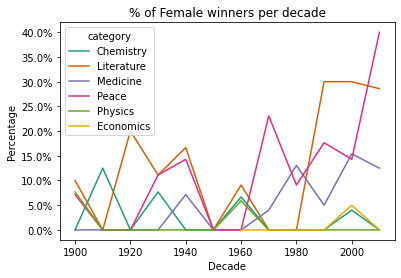

In [88]:
# Plotting the % of female winners on the y-axis

ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, palette='Dark2')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xlabel("Decade")
plt.ylabel("Percentage")
plt.title("% of Female winners per decade")
plt.show()

The plot above shows some interesting trends and patterns.  Thoroughly, the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2000s.

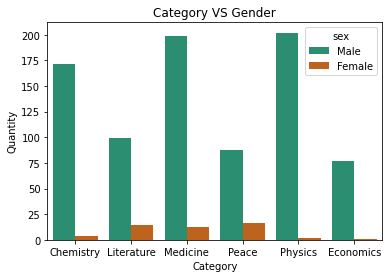

In [89]:
# Plotting category versus gender

sns.countplot(x="category", data=nobel, hue="sex", palette='Dark2')

plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Category VS Gender")
plt.show()

Overall, the plot shows the imbalance between male and female is pretty large with all categories and physics having the largest imbalance. 

In [90]:
# Picking out the first woman to win a Nobel Prize

nobel[nobel['female_winner']].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True


The first woman to win a nobel prize was Mari Curie in physics in 1903.

In [91]:
# Prizes per category

print(nobel['category'].value_counts())

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64


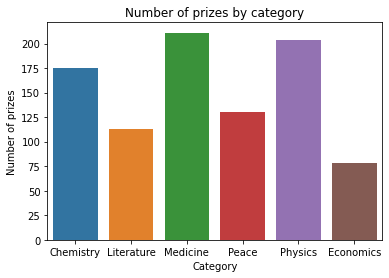

In [92]:
# Plotting prizes per category

sns.countplot(x=nobel['category'])

plt.xlabel("Category")
plt.ylabel("Number of prizes")
plt.title("Number of prizes by category")
plt.show()


Medicine, physics and chemistry have the most number of prizes.

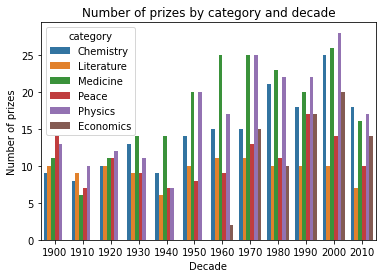

In [93]:
# Plotting the number of prizes per category and decade

sns.countplot(x="decade", data=nobel, hue="category")

plt.xlabel("Decade")
plt.ylabel("Number of prizes")
plt.title("Number of prizes by category and decade")
plt.show()


The number of prizes have been increasing through the years. Keeping in mind that this just covers the years 2010 to 2016.
The economic prize started in the 1960s.

In [94]:
# People and organizations that won more than once

rep_laur = nobel.groupby('full_name').filter(lambda group: len(group) >= 2)
rep_laur

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,False


In [95]:
tab_rep_laur = pd.pivot_table(rep_laur, values='birth_country', index=['full_name', 'prize'],
                    columns=['laureate_type'], aggfunc=np.sum)
tab_rep_laur

laureate_type                                                                                       Individual  \
full_name                                          prize                                                         
Comité international de la Croix Rouge (Interna... The Nobel Peace Prize 1917                              NaN   
                                                   The Nobel Peace Prize 1944                              NaN   
                                                   The Nobel Peace Prize 1963                              NaN   
Frederick Sanger                                   The Nobel Prize in Chemistry 1958            United Kingdom   
                                                   The Nobel Prize in Chemistry 1980            United Kingdom   
John Bardeen                                       The Nobel Prize in Physics 1956    United States of America   
                                                   The Nobel Prize in Physics 1972    United States of America   
Linus Carl Pauling                                 The Nobel Peace Prize 1962         United States of America   
                                                   The Nobel Prize in Chemistry 1954  United States of America   
Marie Curie, née Sklodowska                        The Nobel Prize in Chemistry 1911   Russian Empire (Poland)   
                                                   The Nobel Prize in Physics 1903     Russian Empire (Poland)   
Office of the United Nations High Commissioner ... The Nobel Peace Prize 1954                              NaN   
                                                   The Nobel Peace Prize 1981                              NaN   

laureate_type                                                                        Organization  
full_name                                          prize                                           
Comité international de la Croix Rouge (Interna... The Nobel Peace Prize 1917                   0  
                                                   The Nobel Peace Prize 1944                   0  
                                                   The Nobel Peace Prize 1963                   0  
Frederick Sanger                                   The Nobel Prize in Chemistry 1958          NaN  
                                                   The Nobel Prize in Chemistry 1980          NaN  
John Bardeen                                       The Nobel Prize in Physics 1956            NaN  
                                                   The Nobel Prize in Physics 1972            NaN  
Linus Carl Pauling                                 The Nobel Peace Prize 1962                 NaN  
                                                   The Nobel Prize in Chemistry 1954          NaN  
Marie Curie, née Sklodowska                        The Nobel Prize in Chemistry 1911          NaN  
                                                   The Nobel Prize in Physics 1903            NaN  
Office of the United Nations High Commissioner ... The Nobel Peace Prize 1954                   0  
                                                   The Nobel Peace Prize 1981                   0

There are four individual winners who won it twice each, they are Frederick Sanger, John Bardeen, Linus Carl Pauling and Marie Curie, né Sklodowska.

We also learn that organizations got the prizes too as the Red Cross have gotten it three times and the UNHCR have gotten it twice.

In [96]:
# Counting the numbers of shared prizes.

nobel["prize_share"].value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

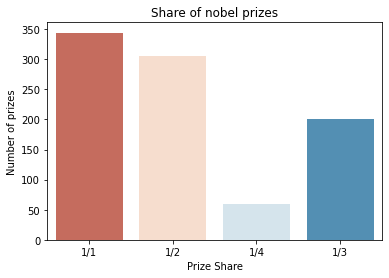

In [97]:
# Plotting the quantity of shared prizes

sns.countplot(data = nobel, x = "prize_share", palette = 'RdBu')

plt.xlabel("Prize Share")
plt.ylabel("Number of prizes")
plt.title("Share of nobel prizes")
plt.show()


Most prizes were individual.

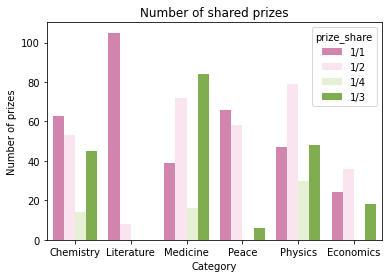

In [98]:
# Plotting the number of shared prizes per category

sns.countplot(x="category", data=nobel, hue="prize_share", palette = 'PiYG')

plt.xlabel("Category")
plt.ylabel("Number of prizes")
plt.title("Number of shared prizes")
plt.show()

Most invidual prizes were in chemistry, peace and literature with the last one having the largest difference.

Most prizes in physics and medicine were shared between two or three people.

Only in chemistry, medicine and physics there were prizes shared between four people.

The econimics prizes were mainly shared between 2 people.


In [99]:
# Filtering shared prizes

shared_prize = nobel.groupby('prize').filter(lambda group: len(group)>=2)

In [100]:
tab_shared_prize = pd.pivot_table(shared_prize, values='birth_country', index=['prize', 'full_name'],
                    columns=['sex'], aggfunc=np.sum)
tab_shared_prize.head(10)

sex                                                                           Female  \
prize                      full_name                                                   
The Nobel Peace Prize 1901 Frédéric Passy                                        NaN   
                           Jean Henry Dunant                                     NaN   
The Nobel Peace Prize 1902 Charles Albert Gobat                                  NaN   
                           Élie Ducommun                                         NaN   
The Nobel Peace Prize 1907 Ernesto Teodoro Moneta                                NaN   
                           Louis Renault                                         NaN   
The Nobel Peace Prize 1908 Fredrik Bajer                                         NaN   
                           Klas Pontus Arnoldson                                 NaN   
The Nobel Peace Prize 1909 Auguste Marie François Beernaert                      NaN   
                           Paul Henri Benjamin Balluet d'Estournelles de C...    NaN   

sex                                                                                               Male  
prize                      full_name                                                                    
The Nobel Peace Prize 1901 Frédéric Passy                                                       France  
                           Jean Henry Dunant                                               Switzerland  
The Nobel Peace Prize 1902 Charles Albert Gobat                                            Switzerland  
                           Élie Ducommun                                                   Switzerland  
The Nobel Peace Prize 1907 Ernesto Teodoro Moneta                              Austrian Empire (Italy)  
                           Louis Renault                                                        France  
The Nobel Peace Prize 1908 Fredrik Bajer                                                       Denmark  
                           Klas Pontus Arnoldson                                                Sweden  
The Nobel Peace Prize 1909 Auguste Marie François Beernaert                                    Belgium  
                           Paul Henri Benjamin Balluet d'Estournelles de C...                   France

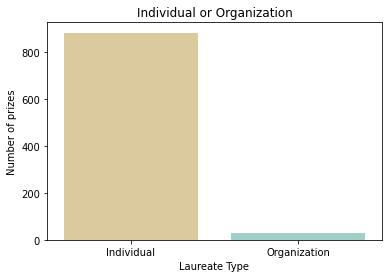

In [101]:
# Plotting the quantity of individual and organizational prizes

sns.countplot(data = nobel, x = "laureate_type", palette = 'BrBG')

plt.xlabel("Laureate Type")
plt.ylabel("Number of prizes")
plt.title("Individual or Organization")
plt.show()

Most prizes were individual.

In [102]:
# Converting birth_date from string to datetime

nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])


# Calculating the age of nobel prize winners

nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

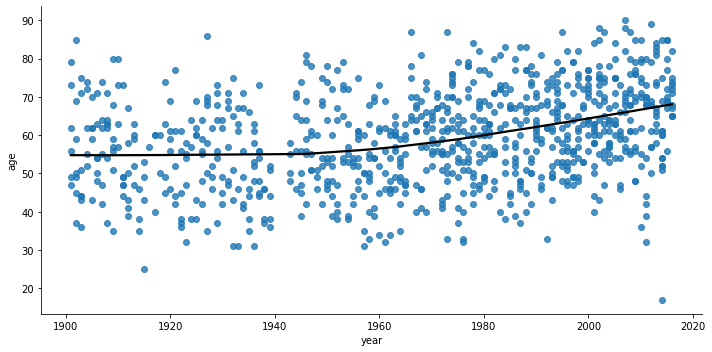

In [103]:
# Plotting the age of nobel prize winners

sns.lmplot(x = 'year', y = 'age', data = nobel, lowess=True, aspect=2, line_kws={'color' : 'black'})
plt.show()


We see that people used to be around 55 when they received the price, but since the 1960s it has been changing, nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is higher nowadays than in the early 1900s.

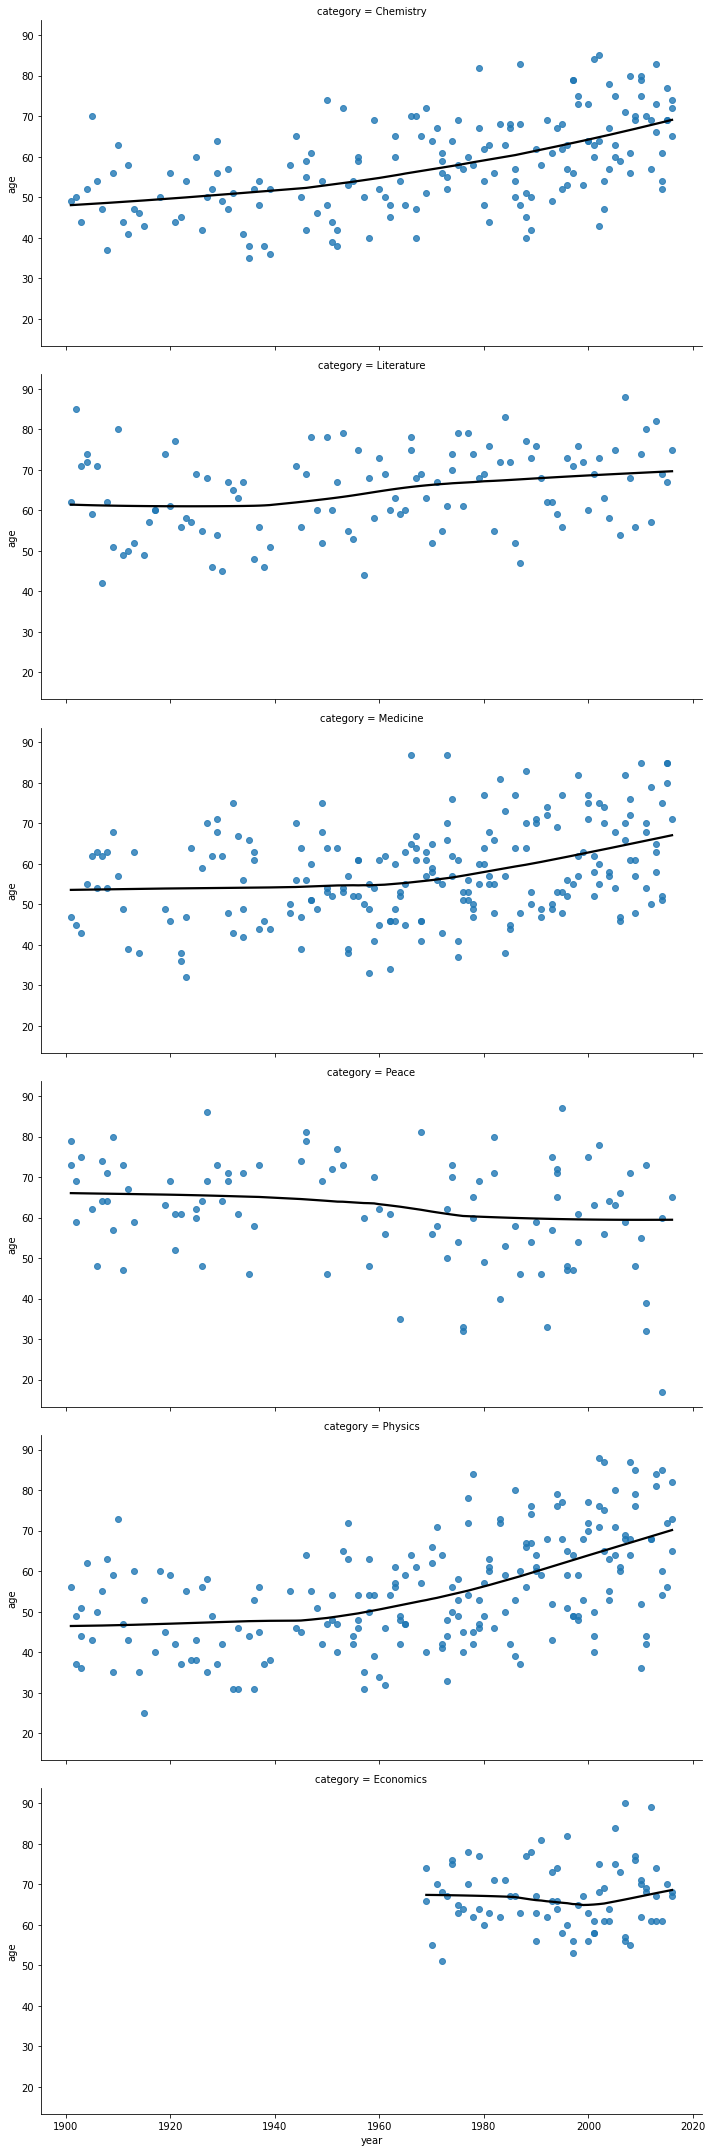

In [104]:
# Separate plots for each category.

sns.lmplot(x = 'year', y = 'age', data = nobel, lowess=True, row ='category', aspect=2, line_kws={'color' : 'black'})

We see that winners of the chemistry, medicine, physics and economics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature is more stable. But peace shows an opposite trend where winners are getting younger.

In [105]:
# The oldest winner of a Nobel Prize

nobel.nlargest(1, 'age')



,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,2000,False,90.0


The oldest winner of a nobel prize was Leonid Hurwicz aged 90 years old.

In [106]:
# The youngest winner of a Nobel Prize

nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,2010,True,17.0


The youngest winner of a nobel prize was Malala Yousafzai aged 17 years old.

In [107]:
# The number of prizes won by the nationalities.

print(nobel['birth_country'].value_counts())

United States of America                         259
United Kingdom                                    85
Germany                                           61
France                                            51
Sweden                                            29
Japan                                             24
Canada                                            18
Netherlands                                       18
Italy                                             17
Russia                                            17
Switzerland                                       16
Austria                                           14
Norway                                            12
China                                             11
Denmark                                           11
Australia                                         10
Belgium                                            9
South Africa                                       9
Scotland                                      

In [108]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


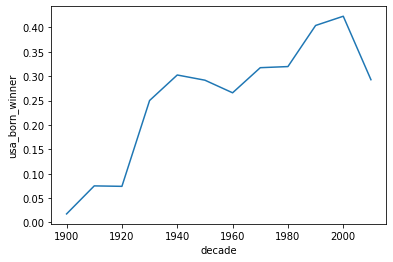

In [109]:
 sns.lineplot(data = prop_usa_winners, x = 'decade', y = 'usa_born_winner')

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. 